<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

### Imports

In [ ]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [ ]:
# the dataset is contained in the `data` folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lab-3 (1).02-validation-master/data/citibike_feb2014.csv')
df.head()

tripduration            starttime             stoptime  start station id  \
0           382  2014-02-01 00:00:00  2014-02-01 00:06:22               294   
1           372  2014-02-01 00:00:03  2014-02-01 00:06:15               285   
2           591  2014-02-01 00:00:09  2014-02-01 00:10:00               247   
3           583  2014-02-01 00:00:32  2014-02-01 00:10:15               357   
4           223  2014-02-01 00:00:41  2014-02-01 00:04:24               401   

        start station name  start station latitude  start station longitude  \
0      Washington Square E               40.730494               -73.995721   
1       Broadway & E 14 St               40.734546               -73.990741   
2   Perry St & Bleecker St               40.735354               -74.004831   
3       E 11 St & Broadway               40.732618               -73.991580   
4  Allen St & Rivington St               40.720196               -73.989978   

   end station id          end station name  end station latitude  \
0             265  Stanton St & Chrystie St             40.722293   
1             439            E 4 St & 2 Ave             40.726281   
2             251       Mott St & Prince St             40.723180   
3             284     Greenwich Ave & 8 Ave             40.739017   
4             439            E 4 St & 2 Ave             40.726281   

   end station longitude  bikeid    usertype birth year  gender  
0             -73.991475   21101  Subscriber       1991       1  
1             -73.989780   15456  Subscriber       1979       2  
2             -73.994800   16281  Subscriber       1948       2  
3             -74.002638   17400  Subscriber       1981       1  
4             -73.989780   19341  Subscriber       1990       1

### Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [ ]:
df.describe()

tripduration  start station id  start station latitude  \
count  224736.000000     224736.000000           224736.000000   
mean      874.519810        439.203479               40.734366   
std      5486.092219        335.723861                0.019031   
min        60.000000         72.000000               40.680342   
25%       360.000000        305.000000               40.721854   
50%       544.000000        403.000000               40.736197   
75%       845.000000        490.000000               40.749156   
max    766108.000000       3002.000000               40.770513   

       start station longitude  end station id  end station latitude  \
count            224736.000000   224736.000000         224736.000000   
mean                -73.990386      440.741995             40.734221   
std                   0.011853      341.497433              0.019048   
min                 -74.017134       72.000000             40.680342   
25%                 -73.998522      305.000000             40.721816   
50%                 -73.990617      403.000000             40.735877   
75%                 -73.981918      488.000000             40.749013   
max                 -73.950048     3002.000000             40.770513   

       end station longitude         bikeid         gender  
count          224736.000000  224736.000000  224736.000000  
mean              -73.990521   18010.598222       1.154617  
std                 0.011920    1987.769335       0.436592  
min               -74.017134   14529.000000       0.000000  
25%               -73.999061   16302.000000       1.000000  
50%               -73.990741   17975.000000       1.000000  
75%               -73.981948   19689.000000       1.000000  
max               -73.950048   21542.000000       2.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

Max Trip duration is 766108 sec which seems like a long amount of time for a bike rental. 

In [ ]:
seconds = 766108
minutes = seconds / 60
print(minutes)


12768.466666666667


The mean trip duration is 15 minutes. 

In [ ]:
seconds = 874
minutes = seconds / 60
print(minutes)


14.566666666666666


Convert trip duration from seconds to hours.

In [ ]:

df['tripduration'] = df['tripduration'] / 3600

print(df['tripduration'])



0         0.106111
1         0.103333
2         0.164167
3         0.161944
4         0.061944
            ...   
224731    0.235556
224732    0.376389
224733    0.084444
224734    0.085556
224735    0.167500
Name: tripduration, Length: 224736, dtype: float64


In [ ]:
df.describe()

tripduration  start station id  start station latitude  \
count  224736.000000     224736.000000           224736.000000   
mean        0.242922        439.203479               40.734366   
std         1.523915        335.723861                0.019031   
min         0.016667         72.000000               40.680342   
25%         0.100000        305.000000               40.721854   
50%         0.151111        403.000000               40.736197   
75%         0.234722        490.000000               40.749156   
max       212.807778       3002.000000               40.770513   

       start station longitude  end station id  end station latitude  \
count            224736.000000   224736.000000         224736.000000   
mean                -73.990386      440.741995             40.734221   
std                   0.011853      341.497433              0.019048   
min                 -74.017134       72.000000             40.680342   
25%                 -73.998522      305.000000             40.721816   
50%                 -73.990617      403.000000             40.735877   
75%                 -73.981918      488.000000             40.749013   
max                 -73.950048     3002.000000             40.770513   

       end station longitude         bikeid         gender  
count          224736.000000  224736.000000  224736.000000  
mean              -73.990521   18010.598222       1.154617  
std                 0.011920    1987.769335       0.436592  
min               -74.017134   14529.000000       0.000000  
25%               -73.999061   16302.000000       1.000000  
50%               -73.990741   17975.000000       1.000000  
75%               -73.981948   19689.000000       1.000000  
max               -73.950048   21542.000000       2.000000

In [ ]:

tripduration_column = df['tripduration']
sorted_tripduration_column = tripduration_column.sort_values(ascending=False)

print(sorted_tripduration_column)


60093     212.807778
74460     163.943333
91489     162.578056
85316     161.305556
91100     141.597222
             ...    
22893       0.016667
141361      0.016667
18969       0.016667
156078      0.016667
53202       0.016667
Name: tripduration, Length: 224736, dtype: float64


Sum of trips greater than 3 hours. Remove those trips from dataframe. 

In [ ]:

count_tripduration_gt_3h = (df['tripduration'] > 3).sum()

print(count_tripduration_gt_3h)


675


In [ ]:

df = df[df['tripduration'] <= 3]

print(df)


        tripduration            starttime             stoptime  \
0           0.106111  2014-02-01 00:00:00  2014-02-01 00:06:22   
1           0.103333  2014-02-01 00:00:03  2014-02-01 00:06:15   
2           0.164167  2014-02-01 00:00:09  2014-02-01 00:10:00   
3           0.161944  2014-02-01 00:00:32  2014-02-01 00:10:15   
4           0.061944  2014-02-01 00:00:41  2014-02-01 00:04:24   
...              ...                  ...                  ...   
224731      0.235556  2014-02-28 23:57:13  2014-03-01 00:11:21   
224732      0.376389  2014-02-28 23:57:55  2014-03-01 00:20:30   
224733      0.084444  2014-02-28 23:58:17  2014-03-01 00:03:21   
224734      0.085556  2014-02-28 23:59:10  2014-03-01 00:04:18   
224735      0.167500  2014-02-28 23:59:47  2014-03-01 00:09:50   

        start station id            start station name  \
0                    294           Washington Square E   
1                    285            Broadway & E 14 St   
2                    247        P

In [ ]:
df.describe()

tripduration  start station id  start station latitude  \
count  224061.000000     224061.000000           224061.000000   
mean        0.194363        439.170101               40.734369   
std         0.170309        335.681307                0.019023   
min         0.016667         72.000000               40.680342   
25%         0.099722        305.000000               40.721854   
50%         0.150833        403.000000               40.736197   
75%         0.233611        490.000000               40.749156   
max         2.985278       3002.000000               40.770513   

       start station longitude  end station id  end station latitude  \
count            224061.000000   224061.000000         224061.000000   
mean                -73.990386      440.699399             40.734224   
std                   0.011849      341.431051              0.019040   
min                 -74.017134       72.000000             40.680342   
25%                 -73.998522      305.000000             40.721816   
50%                 -73.990617      403.000000             40.735877   
75%                 -73.981918      488.000000             40.749013   
max                 -73.950048     3002.000000             40.770513   

       end station longitude         bikeid         gender  
count          224061.000000  224061.000000  224061.000000  
mean              -73.990521   18010.842338       1.154681  
std                 0.011917    1987.722510       0.436298  
min               -74.017134   14529.000000       0.000000  
25%               -73.999061   16302.000000       1.000000  
50%               -73.990741   17976.000000       1.000000  
75%               -73.981948   19689.000000       1.000000  
max               -73.950048   21542.000000       2.000000

In [ ]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

Look at birth year column. Convert from object to float (initial calculation to create age column errored. View NANs.

In [ ]:
#used this site to force na's and convert column to numeric values https://pbpython.com/pandas_dtypes.html

# Replace non-numeric values with NaN
df['birth year'] = pd.to_numeric(df['birth year'], errors='coerce')
df.head()

tripduration            starttime             stoptime  start station id  \
0      0.106111  2014-02-01 00:00:00  2014-02-01 00:06:22               294   
1      0.103333  2014-02-01 00:00:03  2014-02-01 00:06:15               285   
2      0.164167  2014-02-01 00:00:09  2014-02-01 00:10:00               247   
3      0.161944  2014-02-01 00:00:32  2014-02-01 00:10:15               357   
4      0.061944  2014-02-01 00:00:41  2014-02-01 00:04:24               401   

        start station name  start station latitude  start station longitude  \
0      Washington Square E               40.730494               -73.995721   
1       Broadway & E 14 St               40.734546               -73.990741   
2   Perry St & Bleecker St               40.735354               -74.004831   
3       E 11 St & Broadway               40.732618               -73.991580   
4  Allen St & Rivington St               40.720196               -73.989978   

   end station id          end station name  end station latitude  \
0             265  Stanton St & Chrystie St             40.722293   
1             439            E 4 St & 2 Ave             40.726281   
2             251       Mott St & Prince St             40.723180   
3             284     Greenwich Ave & 8 Ave             40.739017   
4             439            E 4 St & 2 Ave             40.726281   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.991475   21101  Subscriber      1991.0       1  
1             -73.989780   15456  Subscriber      1979.0       2  
2             -73.994800   16281  Subscriber      1948.0       2  
3             -74.002638   17400  Subscriber      1981.0       1  
4             -73.989780   19341  Subscriber      1990.0       1

After cleaning age column and creating age feature, view the ages in descending order to make sure dead people aren't riding the bikes. 

In [ ]:
df = df.sort_values('age', ascending=False)
df

tripduration            starttime             stoptime  \
220029      0.095556  2014-02-28 15:03:34  2014-02-28 15:09:18   
211832      0.193056  2014-02-27 17:50:14  2014-02-27 18:01:49   
124361      0.097778  2014-02-20 13:07:08  2014-02-20 13:13:00   
25042       0.125833  2014-02-02 19:44:14  2014-02-02 19:51:47   
177826      0.181944  2014-02-24 20:04:57  2014-02-24 20:15:52   
...              ...                  ...                  ...   
224385      0.077778  2014-02-28 21:42:34  2014-02-28 21:47:14   
224438      0.307222  2014-02-28 22:00:46  2014-02-28 22:19:12   
224525      0.240000  2014-02-28 22:29:52  2014-02-28 22:44:16   
224536      0.189722  2014-02-28 22:32:55  2014-02-28 22:44:18   
224569      0.146389  2014-02-28 22:44:32  2014-02-28 22:53:19   

        start station id        start station name  start station latitude  \
220029               315  South St & Gouverneur Ln               40.703554   
211832               315  South St & Gouverneur Ln               40.703554   
124361               456     E 53 St & Madison Ave               40.759711   
25042                293     Lafayette St & E 8 St               40.730287   
177826              2009  Catherine St & Monroe St               40.711174   
...                  ...                       ...                     ...   
224385               161     LaGuardia Pl & W 3 St               40.729170   
224438               423           W 54 St & 9 Ave               40.765849   
224525               385           E 55 St & 2 Ave               40.757973   
224536               385           E 55 St & 2 Ave               40.757973   
224569               477           W 41 St & 8 Ave               40.756405   

        start station longitude  end station id         end station name  \
220029               -74.006702             224    Spruce St & Nassau St   
211832               -74.006702             224    Spruce St & Nassau St   
124361               -73.974023             469       Broadway & W 53 St   
25042                -73.990765             268    Howard St & Centre St   
177826               -73.996826             259  South St & Whitehall St   
...                         ...             ...                      ...   
224385               -73.998102             382  University Pl & E 14 St   
224438               -73.986905             385          E 55 St & 2 Ave   
224525               -73.966033             441          E 52 St & 2 Ave   
224536               -73.966033             441          E 52 St & 2 Ave   
224569               -73.990026             538          W 49 St & 5 Ave   

        end station latitude  end station longitude  bikeid    usertype  \
220029             40.711464             -74.005524   18103  Subscriber   
211832             40.711464             -74.005524   19986  Subscriber   
124361             40.763441             -73.982681   17510  Subscriber   
25042              40.719105             -73.999733   16160  Subscriber   
177826             40.701221             -74.012342   16872  Subscriber   
...                      ...                    ...     ...         ...   
224385             40.734927             -73.992005   15529    Customer   
224438             40.757973             -73.966033   18720    Customer   
224525             40.756014             -73.967416   21399    Customer   
224536             40.756014             -73.967416   17516    Customer   
224569             40.757952             -73.977876   20019    Customer   

        birth year  gender    age  
220029      1899.0       1  115.0  
211832      1899.0       1  115.0  
124361      1899.0       1  115.0  
25042       1899.0       1  115.0  
177826      1899.0       1  115.0  
...            ...     ...    ...  
224385         NaN       0    NaN  
224438         NaN       0    NaN  
224525         NaN       0    NaN  
224536         NaN       0    NaN  
224569         NaN       0    NaN  

[224061 rows x 16 columns]

Drop NaN's and people older than 90 from data set. 

In [ ]:
# Dropping NaN valaues
df = df.dropna(subset=['birth year'])
df.head()

tripduration            starttime             stoptime  \
220029      0.095556  2014-02-28 15:03:34  2014-02-28 15:09:18   
211832      0.193056  2014-02-27 17:50:14  2014-02-27 18:01:49   
124361      0.097778  2014-02-20 13:07:08  2014-02-20 13:13:00   
25042       0.125833  2014-02-02 19:44:14  2014-02-02 19:51:47   
177826      0.181944  2014-02-24 20:04:57  2014-02-24 20:15:52   

        start station id        start station name  start station latitude  \
220029               315  South St & Gouverneur Ln               40.703554   
211832               315  South St & Gouverneur Ln               40.703554   
124361               456     E 53 St & Madison Ave               40.759711   
25042                293     Lafayette St & E 8 St               40.730287   
177826              2009  Catherine St & Monroe St               40.711174   

        start station longitude  end station id         end station name  \
220029               -74.006702             224    Spruce St & Nassau St   
211832               -74.006702             224    Spruce St & Nassau St   
124361               -73.974023             469       Broadway & W 53 St   
25042                -73.990765             268    Howard St & Centre St   
177826               -73.996826             259  South St & Whitehall St   

        end station latitude  end station longitude  bikeid    usertype  \
220029             40.711464             -74.005524   18103  Subscriber   
211832             40.711464             -74.005524   19986  Subscriber   
124361             40.763441             -73.982681   17510  Subscriber   
25042              40.719105             -73.999733   16160  Subscriber   
177826             40.701221             -74.012342   16872  Subscriber   

        birth year  gender    age  
220029      1899.0       1  115.0  
211832      1899.0       1  115.0  
124361      1899.0       1  115.0  
25042       1899.0       1  115.0  
177826      1899.0       1  115.0

In [ ]:
#verified ages greater than 90 years old not included
df = df[df['age'] <= 90]
df.head(10)

tripduration            starttime             stoptime  \
65245       0.452778  2014-02-09 14:59:29  2014-02-09 15:26:39   
23642       0.300833  2014-02-02 17:43:45  2014-02-02 18:01:48   
33940       0.062778  2014-02-04 16:58:20  2014-02-04 17:02:06   
44179       0.164167  2014-02-06 15:29:11  2014-02-06 15:39:02   
44876       0.220278  2014-02-06 16:57:41  2014-02-06 17:10:54   
162719      0.189444  2014-02-23 17:13:52  2014-02-23 17:25:14   
166625      0.106667  2014-02-24 06:38:17  2014-02-24 06:44:41   
129122      0.110278  2014-02-20 18:51:30  2014-02-20 18:58:07   
22699       0.160000  2014-02-02 17:01:12  2014-02-02 17:10:48   
153787      0.106667  2014-02-23 08:48:23  2014-02-23 08:54:47   

        start station id        start station name  start station latitude  \
65245                168           W 18 St & 6 Ave               40.739713   
23642                404           9 Ave & W 14 St               40.740583   
33940                512           W 29 St & 9 Ave               40.750073   
44179                434           9 Ave & W 18 St               40.743174   
44876                347  W Houston St & Hudson St               40.728739   
162719               345           W 13 St & 6 Ave               40.736494   
166625               280           E 10 St & 5 Ave               40.733320   
129122               308   St James Pl & Oliver St               40.713079   
22699                412     Forsyth St & Canal St               40.715815   
153787               264      Maiden Ln & Pearl St               40.707065   

        start station longitude  end station id          end station name  \
65245                -73.994564             480          W 53 St & 10 Ave   
23642                -74.005509             480          W 53 St & 10 Ave   
33940                -73.998393             509           9 Ave & W 22 St   
44179                -74.003664             347  W Houston St & Hudson St   
44876                -74.007488             470           W 20 St & 8 Ave   
162719               -73.997044             128  MacDougal St & Prince St   
166625               -73.995101             128  MacDougal St & Prince St   
129122               -73.998512             264      Maiden Ln & Pearl St   
22699                -73.994224             264      Maiden Ln & Pearl St   
153787               -74.007319             355     Bayard St & Baxter St   

        end station latitude  end station longitude  bikeid    usertype  \
65245              40.766697             -73.990617   15307  Subscriber   
23642              40.766697             -73.990617   15159  Subscriber   
33940              40.745497             -74.001971   15859  Subscriber   
44179              40.728739             -74.007488   15097  Subscriber   
44876              40.743453             -74.000040   18251  Subscriber   
162719             40.727103             -74.002971   15979  Subscriber   
166625             40.727103             -74.002971   17320  Subscriber   
129122             40.707065             -74.007319   19388  Subscriber   
22699              40.707065             -74.007319   14761  Subscriber   
153787             40.716021             -73.999744   20536  Subscriber   

        birth year  gender   age  
65245       1926.0       2  88.0  
23642       1926.0       2  88.0  
33940       1926.0       2  88.0  
44179       1926.0       2  88.0  
44876       1926.0       2  88.0  
162719      1927.0       1  87.0  
166625      1927.0       1  87.0  
129122      1932.0       2  82.0  
22699       1932.0       2  82.0  
153787      1932.0       2  82.0

Gender: Found unique genders. Sum of unique genders. For data set where gender is 0, it is unknown. Removed genders that are unknown. 

In [ ]:
unique_genders = df['gender'].unique()
print("Unique genders:", unique_genders)


Unique genders: [2 1 0]


In [ ]:
gender_counts = df['gender'].value_counts()
print("Gender counts:\n", gender_counts)


Gender counts:
 1    175915
2     41335
0        14
Name: gender, dtype: int64


In [ ]:
df = df[df['gender'] != 0]


In [ ]:
#Checked genders again
unique_genders = df['gender'].unique()
print("Unique genders:", unique_genders)

Unique genders: [2 1]


In [ ]:
# Create dummies for 'gender'
dummies = pd.get_dummies(df['gender'], prefix=None, drop_first=True)

# Add dummies to original DataFrame
df = pd.concat([df, dummies], axis=1)

# Drop original 'gender' column
df.drop('gender', axis=1, inplace=True)


Subscribers column is an object. Convert to int and create dummy variables

In [29]:
print(df['usertype'].dtype)


object


In [32]:
df['usertype'] = df['usertype'].map({'Subscriber': 1, 'Customer': 0}).astype(int)


In [34]:
df.head()

tripduration            starttime             stoptime  \
0      0.106111  2014-02-01 00:00:00  2014-02-01 00:06:22   
1      0.103333  2014-02-01 00:00:03  2014-02-01 00:06:15   
2      0.164167  2014-02-01 00:00:09  2014-02-01 00:10:00   
3      0.161944  2014-02-01 00:00:32  2014-02-01 00:10:15   
4      0.061944  2014-02-01 00:00:41  2014-02-01 00:04:24   

        start station name  start station latitude  start station longitude  \
0      Washington Square E               40.730494               -73.995721   
1       Broadway & E 14 St               40.734546               -73.990741   
2   Perry St & Bleecker St               40.735354               -74.004831   
3       E 11 St & Broadway               40.732618               -73.991580   
4  Allen St & Rivington St               40.720196               -73.989978   

   end station id          end station name  end station latitude  \
0             265  Stanton St & Chrystie St             40.722293   
1             439            E 4 St & 2 Ave             40.726281   
2             251       Mott St & Prince St             40.723180   
3             284     Greenwich Ave & 8 Ave             40.739017   
4             439            E 4 St & 2 Ave             40.726281   

   end station longitude  ...  2008  2009  2010  2012  2017  2021  2022  2023  \
0             -73.991475  ...     0     0     0     0     0     0     0     0   
1             -73.989780  ...     0     0     0     0     0     0     0     0   
2             -73.994800  ...     0     0     0     0     0     0     0     0   
3             -74.002638  ...     0     0     0     0     0     0     0     0   
4             -73.989780  ...     0     0     0     0     0     0     0     0   

   3002   age  
0     0  23.0  
1     0  35.0  
2     0  66.0  
3     0  33.0  
4     0  24.0  

[5 rows x 343 columns]

In [36]:
df.info(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217384 entries, 0 to 224735
Data columns (total 343 columns):
 #    Column                   Dtype  
---   ------                   -----  
 0    tripduration             float64
 1    starttime                object 
 2    stoptime                 object 
 3    start station name       object 
 4    start station latitude   float64
 5    start station longitude  float64
 6    end station id           int64  
 7    end station name         object 
 8    end station latitude     float64
 9    end station longitude    float64
 10   bikeid                   int64  
 11   usertype                 int64  
 12   birth year               float64
 13   2                        uint8  
 14   79                       uint8  
 15   82                       uint8  
 16   83                       uint8  
 17   116                      uint8  
 18   119                      uint8  
 19   120                      uint8  
 20   127                     

-----

### What numeric columns shouldn't be treated as numeric?

**Answer:**

Anything treated as a category like gender, usertype, station id. 

### Dummify the `start station id` variable

In [ ]:
# Create dummies for 'start station id'
dummies = pd.get_dummies(df['start station id'], prefix=None, drop_first=True)

# Add dummies 
df = pd.concat([df, dummies], axis=1)

# Drop original 'start station id' column
df.drop('start station id', axis=1, inplace=True)

In [ ]:
df.head()

tripduration            starttime             stoptime  \
65245      0.452778  2014-02-09 14:59:29  2014-02-09 15:26:39   
23642      0.300833  2014-02-02 17:43:45  2014-02-02 18:01:48   
33940      0.062778  2014-02-04 16:58:20  2014-02-04 17:02:06   
44179      0.164167  2014-02-06 15:29:11  2014-02-06 15:39:02   
44876      0.220278  2014-02-06 16:57:41  2014-02-06 17:10:54   

             start station name  start station latitude  \
65245           W 18 St & 6 Ave               40.739713   
23642           9 Ave & W 14 St               40.740583   
33940           W 29 St & 9 Ave               40.750073   
44179           9 Ave & W 18 St               40.743174   
44876  W Houston St & Hudson St               40.728739   

       start station longitude  end station id          end station name  \
65245               -73.994564             480          W 53 St & 10 Ave   
23642               -74.005509             480          W 53 St & 10 Ave   
33940               -73.998393             509           9 Ave & W 22 St   
44179               -74.003664             347  W Houston St & Hudson St   
44876               -74.007488             470           W 20 St & 8 Ave   

       end station latitude  end station longitude  ...  2006 2008  2009  \
65245             40.766697             -73.990617  ...     0    0     0   
23642             40.766697             -73.990617  ...     0    0     0   
33940             40.745497             -74.001971  ...     0    0     0   
44179             40.728739             -74.007488  ...     0    0     0   
44876             40.743453             -74.000040  ...     0    0     0   

       2010  2012  2017  2021  2022  2023  3002  
65245     0     0     0     0     0     0     0  
23642     0     0     0     0     0     0     0  
33940     0     0     0     0     0     0     0  
44179     0     0     0     0     0     0     0  
44876     0     0     0     0     0     0     0  

[5 rows x 343 columns]

### Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data to do this.

In [ ]:
df['age'] = 2014 - df['birth year']
df['age']

0         23.0
1         35.0
2         66.0
3         33.0
4         24.0
          ... 
224731    38.0
224732    29.0
224733    46.0
224734    32.0
224735    54.0
Name: age, Length: 224061, dtype: float64

In [ ]:
gender_type = df['gender'].dtype
print("Data type of the 'gender' column:", gender_type)


Data type of the 'gender' column: int64


### Split your data into train and test sets

Look at the size of your data. What is a good proportion for your split? Justify your answer.

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`.

**NOTE:** When doing your train/test split, please use random seed 123.

In [37]:
y = df['tripduration']
X = df.iloc[:, 12:]
 

### Fit a linear regression model in `sklearn` predicting `tripduration`

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [40]:

# Create a linear regression object
reg = LinearRegression()
reg



LinearRegression()

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=123)


In [44]:
# Convert column names to string
X_train.columns = X_train.columns.astype(str)

#Fit LR
reg.fit(X_train, y_train)





LinearRegression()

In [48]:
reg.score(X_train,y_train)

0.03816315913984025

In [50]:
# Error message to change type to str 
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# Use the trained model to predict the trip duration for the test data
y_pred = reg.predict(X_test)


In [51]:
y_pred

array([0.15698242, 0.15600586, 0.16052246, ..., 0.16760254, 0.22351074,
       0.18469238])

### Evaluate your model

Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

Based on Reg.score this model is awful. When I look at the mean trip duration, which is 0.1879, it doesn't seem bad. Mean y_pred = 0.1884, mean y_train = 0.1882. I'm not sure what I messed up with this model. 

In [54]:


mean_y_pred = np.mean(y_pred)
print(mean_y_pred)




0.18844757978534793


In [55]:


mean_y_train = np.mean(y_train)
print(mean_y_train)


0.188286564849377


In [56]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 0.023800340726070447


### (BONUS) Analyze your model's residuals

Analyze and interpret your model's errors. Consider a histogram of residuals, a scatterplot of residuals vs. predicted, a scatterplot of actuals vs. predicted, etc. What sorts of mistakes is the model making? Do you notice any patterns?

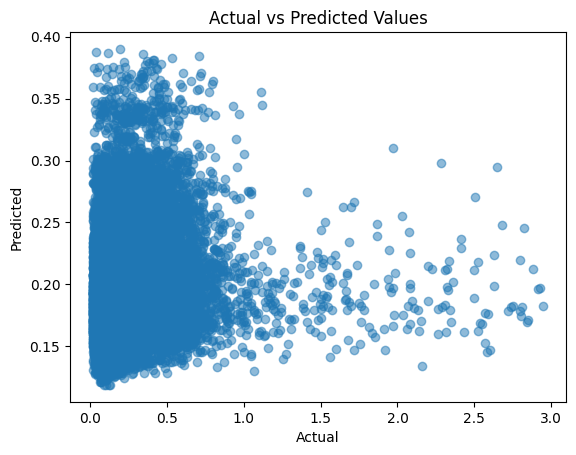

In [57]:


# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()
